In [ ]:
# HW 1: How do you handle duplicate values in a dataset in Python?

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [ ]:
# hw 1

In [3]:
# if in a numpy array
a = np.array([1,2,3,3,4,5])
print a

a_dedupe = np.unique(a)
print a_dedupe

[1 2 3 3 4 5]
[1 2 3 4 5]


In [6]:
# if a dataframe
b = pd.DataFrame([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,6]])
#b = np.array([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,6]])

# after checking on documentation, we know that...
b_dedupe = b.drop_duplicates()
b_dedupe

# what about remove duplicate columns?

,0,1,2,3,4
0,1,2,3,4,5
2,1,2,3,4,6


In [ ]:
# HW 2: friend request

In [ ]:
friend_request = pd.DataFrame(
    {"requester_id":[1001,1002,1003],
     "time":["2017-07-01","2017-07-02","2017-07-03"],
     "receiver_id":[3001,3002,3003]}
)

request_accepted = pd.DataFrame(
    {"requester_id":[1001,1003],
     "time":["2017-07-01","2017-07-04"],
     "acceptor_id":[3001,3003]}
)

print(friend_request)
print(request_accepted)

# sql
'''
select
T1.date,
sum(if(t2.acceptor_id is null, 0, 1))/sum(1) as acceptance_rate
from friend_request t1
left join request_accepted t2
on t1.requester_id=t2.requeter_id
and T1.receiver_id=T2.acceptor_id
group by 1;
'''

In [ ]:
a = pd.merge(friend_request,request_accepted,how="left",left_on=["requester_id", "receiver_id"], \
             right_on=["requester_id", "acceptor_id"])
len(a["acceptor_id"][a.acceptor_id > 0])/(len(a["acceptor_id"])*1.0)

In [ ]:
#### HM #3
#### credit card question

In [ ]:
def issuer_detector(cc):
    # amex
    if len(cc) == 15 and (cc[0:2]=='34' or cc[0:2]=='37'):
        return "AMEX"
    # diners club
    if len(cc)==14 and cc[0:2]=='36':
        return "DINERS CLUB"
    # visa
    if len(cc)==16 and cc[0:1]=='4':
        if cc[0:4] == "4026" \
            or cc[0:4] == "4405" \
            or cc[0:4] == "4408" \
            or cc[0:4] == "4844" \
            or cc[0:4] == "4913" \
            or cc[0:6] == "417500":
            return "VISAELECTRON"
        else:
            return "VISA"
    else:
        return "NA"

In [ ]:
my_cc = ['4175004175004172', 
         '4917491749174917',
         '346416800707698',
         '376416800707698',
         '37641680070769832112',
         '36641680070769',
         '54545641680070769']

for cc in my_cc:
    print cc + " " + issuer_detector(cc)

In [ ]:
##### homework #4

In [9]:
file_location = "/Users/mingchang/Downloads/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)

In [10]:
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [11]:
# deal with date format
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')

In [12]:
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [13]:
my_id = 12624548
country="US"
table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == country)]

In [17]:
series = np.cumsum(series) ## this is the key

In [20]:
series

date
2017-04-01     19161.677584
2017-04-02     35212.357584
2017-04-03     49546.127584
2017-04-04     63626.336693
2017-04-05     77762.714860
2017-04-06     94620.114860
2017-04-07    114451.306257
Name: spend_usd, dtype: float64

In [21]:
total_revenue = series[-1]
total_revenue

114451.30625699888

In [22]:
(series, total_revenue)

(date
 2017-04-01     19161.677584
 2017-04-02     35212.357584
 2017-04-03     49546.127584
 2017-04-04     63626.336693
 2017-04-05     77762.714860
 2017-04-06     94620.114860
 2017-04-07    114451.306257
 Name: spend_usd, dtype: float64, 114451.30625699888)

In [23]:
# now, PrintCumulativeTimeSeries()
# a few function to return the cumulative sum instead of sum
def GetCumulativeSeries(my_data, my_id, country):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == country)]
    series = table.groupby('date')['spend_usd'].sum() # select date, sum(spend) from a group by 1
    series = np.cumsum(series) ## this is the key
    total_revenue = series[-1]
    return((series, total_revenue))

# same as before
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()
    
def PrintCumulativeTimeSeries(my_data, experiment_ids, country):
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetCumulativeSeries(my_data, experiment_ids[0], country)[0]
    treatment_revenue = GetCumulativeSeries(my_data, experiment_ids[0], country)[1]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1], country)[0]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1], country)[1]
    
    print("Cumulative revenue impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(treatment_series, control_series)

Cumulative revenue impact: -2.46850453816%


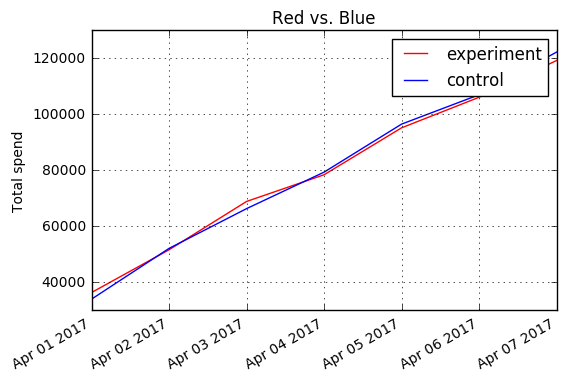

In [25]:
PrintCumulativeTimeSeries(my_data, [12624548,12624549], "JP")